<a href="https://colab.research.google.com/github/ShoSato-047/STAT380/blob/main/HW3_KEY_(2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTRUCTIONS

Save a copy of this notebook in your Google drive.  Complete the HW and submit a **viewable** link (make sure to change share permissions from "**Restricted**" to "**Anyone with link can view**".

***Bold and italicize the font of your responses.***

# Question 1 (30 points)

In this question we investigate number of deaths caused by the HIV virus per year in the tri-state area of Iowa, Minnesota, and Wisconsin from 1999-2020.  Data accessed via the [CDC Wonder](https://wonder.cdc.gov/controller/saved/D76/D325F404) query system.

In [ ]:
hiv_deaths <- read.csv('https://www.dropbox.com/s/xt2hn9yro6h3hg2/hiv_deaths.csv?dl=1')
head(hiv_deaths)

,State,Year,Deaths,Population
,<chr>,<int>,<int>,<int>
1,Iowa,1999,21,2917634
2,Iowa,2000,23,2926324
3,Iowa,2001,18,2931997
4,Iowa,2002,29,2934234
5,Iowa,2003,20,2941999
6,Iowa,2004,27,2953635


Here the response variable $Y_i$ measures the number of occurrences (deaths) per unit time (1 year), so a Poisson distribution seems appropriate for modeling this response.  Specifically:

$$P(Y_i = k_i; \lambda) = \frac{e^{-\lambda\cdot 1}(\lambda\cdot 1)^{k_i}}{k_i!} =  \frac{e^{-\lambda}\lambda^{k_i}}{k_i!}$$

Recall for any model with parameter vector $\theta$, the log-likelihood of the observed data $Y$ given values of $\theta$ is:

$$logLik(\theta) = \log\left(\prod_{i=1}^n P(Y_i = k_i;\theta)\right) =  \sum_{i=1}^n \log(P(Y_i = k_i))$$

Consider **Model 1**, a Poisson model with a single parameter $\lambda$ that is in common for all data values.  For this model, the log-likelihood is:

$$logLik(\lambda) = \sum_{i=1}^n \log\left(\frac{e^{-\lambda}\lambda^{k_i}}{k_i!}\right),$$

so each data row with observation $k_i$ HIV deaths contributes $\log\left(\frac{e^{-\lambda}\lambda^{k_i}}{k_i!}\right)$ to Model 1's log-likelihood.

We want to also consider **Model 2**, a model with three parameters $(\lambda_I, \lambda_M, \lambda_W)$ for Iowa, Minnesota, and Wisconsin, respectively, that allows the rate parameters to vary by state.  The Model 2 log-likelihood is:

$$logLik(\lambda_I, \lambda_M, \lambda_W) = \sum_{all\ k_i\in IA}\log\left(\frac{e^{-\lambda_I}\lambda_I^{k_i}}{k_i!}\right) +\sum_{all\ k_i\in MN}\log\left(\frac{e^{-\lambda_M}\lambda_M^{k_i}}{k_i!}\right) +\sum_{all\ k_i\in WI}\log\left(\frac{e^{-\lambda_W}\lambda_W^{k_i}}{k_i!}\right) $$

## A) Warmup: Finding log-likelihood contributions

Consider the following three states:

In [ ]:
library(dplyr)
hiv_deaths %>%
  slice(1, 25, 50)

State,Year,Deaths,Population
<chr>,<int>,<int>,<int>
Iowa,1999,21,2917634
Minnesota,2001,53,4982796
Wisconsin,2004,48,5514026


### i) Model 1

What is the total contribution of these three data values to the Model 1 log-likelihood, as a function of $\lambda$?

$$\log\left(\frac{e^{-\lambda}\lambda^{21}}{21!}\right) + \log\left(\frac{e^{-\lambda}\lambda^{53}}{53!}\right) + \log\left(\frac{e^{-\lambda}\lambda^{48}}{48!}\right)$$

### ii) Model 2

What is the total contribution of these three data values to the Model 2 log-likelihood, as a function of $(\lambda_I, \lambda_M, \lambda_W)$?

$$\log\left(\frac{e^{-\lambda_I}\lambda_I^{21}}{21!}\right) + \log\left(\frac{e^{-\lambda_M}\lambda_M^{53}}{53!}\right) + \log\left(\frac{e^{-\lambda_W}\lambda_W^{48}}{48!}\right)$$

## B) Writing the log-likelihood functions


### i) Model 1


Write a function `loglik.model1(lambda)` that takes as an argument a single parameter $\lambda$ and returns the log-likelihood of all the observed data values.  Check that it works by verifying `loglik.model1(30)` returns `-491.7487`.

In [ ]:
loglik.model1 <- function(lambda) {
  out <- sum(log(dpois(hiv_deaths$Deaths, lambda)))
  return(out)
}

In [ ]:
loglik.model1(30)

[1] -491.7487

### ii) Model 2

Write a function `loglik.model2(lambdavec)` that takes as an argument a vector of 3 parameters $(\lambda_I, \lambda_M, \lambda_W)$ and returns the log-likelihood of all the observed data values for those parameters.  Check that it works by verifying `loglik.model2(c(20, 50, 40))` returns `-315.1246367`.

Hint: the code below calculates the contribution of each row to the Model 2 log-likelihood when $(\lambda_I, \lambda_M, \lambda_W)=(30, 30, 30)$, then finds the total contribution.

In [ ]:
lambdaI <- 20
lambdaM  <- 50
lambdaW <- 40
example <- hiv_deaths %>%
  mutate(model2.loglik.contribution = case_when(State=='Iowa'~log(dpois(Deaths, lambdaI)),
                                                State=='Minnesota'~log(dpois(Deaths, lambdaM)),
                                                State=='Wisconsin'~log(dpois(Deaths, lambdaW))
                                                )
        )

In [ ]:
head(example)

,State,Year,Deaths,Population,model2.loglik.contribution
,<chr>,<int>,<int>,<int>,<dbl>
1,Iowa,1999,21,2917634,-2.469761
2,Iowa,2000,23,2926324,-2.704833
3,Iowa,2001,18,2931997,-2.472264
4,Iowa,2002,29,2934234,-4.380803
5,Iowa,2003,20,2941999,-2.420971
6,Iowa,2004,27,2953635,-3.672767


In [ ]:
loglik.model2 <- function(lambdavec) {
  lambdaI <- lambdavec[1]
  lambdaM <- lambdavec[2]
  lambdaW <- lambdavec[3]
  example <- hiv_deaths %>%
  mutate(model2.loglik.contribution = case_when(State=='Iowa'~log(dpois(Deaths, lambdaI)),
                                                State=='Minnesota'~log(dpois(Deaths, lambdaM)),
                                                State=='Wisconsin'~log(dpois(Deaths, lambdaW))
                                                )
        )

  out <- sum(example$model2.loglik.contribution)
  return(out)
}

In [ ]:
loglik.model2(c(20, 50, 40))

[1] -315.1246

## C) Maximizing the log-likelihoods

Find the maximum likelihood estimators (MLEs) for the two models:

### i) Model 1

Use `optimize()` and `loglik.model1()` to find the MLE of $\lambda$ for the single-parameter Model 1.  Verify that the MLE is just the average number of deaths across all states in the data set.

In [ ]:
optimize(loglik.model1, interval = c(0,50), maximum=TRUE)

$maximum
[1] 36.77272

$objective
[1] -444.7108

In [ ]:
mean(hiv_deaths$Deaths)

[1] 36.77273

### ii) Model 2

Use `optim()` and `loglik.model2()` to find the MLE of $(\lambda_I, \lambda_M, \lambda_W)$ for the three-parameter Model 2.  Verify that the MLEs are the average number of deaths by state in the data set.

In [ ]:
optim(loglik.model2, par = c(30,30,30), control = list(fnscale = -1))

$par
[1] 19.49951 43.94985 46.86101

$value
[1] -294.3285

$counts
function gradient 
     136       NA 

$convergence
[1] 0

$message
NULL

In [ ]:
hiv_deaths %>%
  group_by(State) %>%
    summarize(mean(Deaths))

State,mean(Deaths)
<chr>,<dbl>
Iowa,19.50000
Minnesota,43.95455
Wisconsin,46.86364


## D) Comparing the models


### i) AIC, BIC
Fill in the table below with the model metrics:

Model | Number of parameters | Maximized log-likelihood | AIC | BIC |
--- | --- | --- | --- | --- |
1   |   1  |  -444.71    |  891.4   |  893.6   |
2   |   3  |   -294.33  |   594.7  |   601.2  |


In [ ]:
#The two maximized log-likelihoods:
ll.model1 <- -444.710808190839
ll.model2 <- -294.328520825565

In [ ]:
#AICs:
-2*ll1+2
-2*ll2+2*3

[1] 891.4216

[1] 594.657

In [ ]:
#BICs:
-2*ll1+log(nrow(hiv_deaths))
-2*ll2+log(nrow(hiv_deaths))*3

[1] 893.6113

[1] 601.226

### ii) Likelihood ratio test

Find the likelihood ratio test statistic and its associated p-value.

In [ ]:
(Lambda <- 2*(ll2-ll1))

[1] 300.7646

In [ ]:
pchisq(Lambda, df = 2, lower.tail=FALSE)

[1] 4.89556e-66

## E) Summary and conclusion

Take a step back and summarize your findings.  How do HIV deaths vary across state?  Is there evidence that this difference is meaningful?  Use all your results up to this point to justify your claims.

***HIV rates do vary by state, with the number of deaths highest on average in Wisconsin and lowest in Iowa (these are of course highly dependent on the state's overall population, which we will learn to adjust for later in the semester).  There is strong evidence that the rate of deaths differ by state: the AIC and BIC are both much smaller for Model 2, indicating 3 rate parameters are necessary.  The p-value from the likelihood ratio test is also highly significant, indicating Model 2 is a notable improvement upon Model 1.***

# Question 2 (30 points)

A topic of some interest in the genetics literature over the past 30 years has been the study of sex-ratio data. In particular, one suggested hypothesis is that there are enough families with an unbalanced sex ratio among their children that the sexes of successive childbirths are not independent random variables but are rather related to each other. This hypothesis suggests that if a couple’s first child is (fe)male, they are more likely to have (fe)male children in successive births. (Personal anecdote: among my wife and her siblings, one has five children (all boys); one has four children (all girls); one has three children (all girls); and my wife and I have two children (both boys). Nobody has yet had two children of different sexes. Coincidence or signal?) The data in the Sex Ratio file report on 175,313 children from 51,868 families with at least two children.  For families with more than 5 children, the sexes of just the first 5 are given.  Thus the maximium family size reported is 5.


In [ ]:
sexratios <- read.csv('https://www.dropbox.com/s/c04146dc7gbz5kr/sex_ratios_uncounted.csv?dl=1')

A couple exemplary families to give you a feel for the data set:

In [ ]:
sexratios %>% filter(familyid==43515)

familyid,childid,nm_chld,sexchldn,sxchld,sxprev
<int>,<int>,<int>,<chr>,<chr>,<chr>
43515,1,5,MFFFM,M,First
43515,2,5,MFFFM,F,M
43515,3,5,MFFFM,F,F
43515,4,5,MFFFM,F,F
43515,5,5,MFFFM,M,F


In [ ]:
sexratios %>% filter(familyid==24303)

familyid,childid,nm_chld,sexchldn,sxchld,sxprev
<int>,<int>,<int>,<chr>,<chr>,<chr>
24303,1,3,FMM,F,First
24303,2,3,FMM,M,F
24303,3,3,FMM,M,M


Columns:

*	`familyid`, `childid`: IDs for family and child within family
*	`nm_chld`: number of children in family
* `sexchldn`: sequence of child sex
* `sxchld`: the sex of each child; this is the primary response variable, $Y_i$.
* `sxprev`: one of `First`, `M`, `F` indicating whether that child was a first-born, or followed a Male or Female child, respectively.  This is the primary $X_i$ variable.

We want to consider two different models for $Y$, the binary variable indicating whether each child is male/female.  For this problem we will code $Y = 1$ for male children and $Y=0$ for female children.

Recall for any model with parameter vector $\theta$, the log-likelihood of the observed data $Y$ given values of $\theta$ is:

$$logLik(\theta) = \log\left(\prod_{i=1}^n P(Y_i = k_i)\right) =  \sum_{i=1}^n \log(P(Y_i = k_i))$$


We'll consider 2 different models:


***Model 1:*** the sexes of previous children are not related to the sex of the current child.  This is a one-parameter model with a single $p$ representing $P(Y_i = 1)$: the probability of a male child regardless of any previous children born.  $1-p$ represents $P(Y_i = 0)$, the probability of a female child regardless of any previous children born.

Under Model 1, the contribution of each child to the log-likelihood is:

$$\log\left(p^{k_i}(1-p)^{1-k_i}\right) = k_i \log(p) + (1-k_i) \log(p)$$

That is:

* Each male child contributes $\log(p)$ to the log-likelihood
* Each female child contributes $\log(1-p)$ to the log-likelihood



***Model 2:*** the probability of having a (fe)male child depends on the sex of the previous child.  We'll use three parameters for this model: $p_1$, $p_M$, and $p_F$, where:
* $p_1 = P(Y_i = 1 | \mbox{first-born})$ represents probability of a male on the first birth; $P(Y_i = 0 | \mbox{first-born})=1-p_1$ represents probability of female on the first birth.
  - Each first-born male child contributes $\log(p_1)$ to Model 2's log-likelihood
  - Each first-born female child contributes $\log(1-p_1)$ to Model 2's log-likelihood  
* $p_M=P(Y_i = 1 | \mbox{previous child was male})$ represents probability of a male given the previous child was male; $1-p_M = P(Y_i = 0 | \mbox{previous child was female})$ represents probability of female given the previous child was male.
  - Each male born after a male contributes $\log(p_M)$ to Model 2's log-likelihood
  - Each female born after a male contributes $\log(1-p_M)$ to Model 2's log-likelihood  
* $p_F=P(Y_i = 1 | \mbox{previous child was female})$ represents probability of a male given the previous child was female; $1-p_F = P(Y_i = 0 | \mbox{previous child was female})$ represents probability of female given the previous child was female.
  - Each male born after a female contributes $\log(p_F)$ to Model 2's log-likelihood
  - Each female born after a female contributes $\log(1-p_F)$ to Model 2's log-likelihood  

## A) Warmup: finding log-likelihood contributions

Consider the family below:

In [ ]:
family43515 <- sexratios %>% filter(familyid==43515)
family43515

familyid,childid,nm_chld,sexchldn,sxchld,sxprev
<int>,<int>,<int>,<chr>,<chr>,<chr>
43515,1,5,MFFFM,M,First
43515,2,5,MFFFM,F,M
43515,3,5,MFFFM,F,F
43515,4,5,MFFFM,F,F
43515,5,5,MFFFM,M,F


### i) Model 1

What is the total contribution of this family to the Model 1 log-likelihood, as a function of $p$?

$$\log(p) + \log(1-p) + \log(1-p) + \log(1-p) + \log(p)$$

### ii) Model 2

What is the total contribution of this family to the Model 2 log-likelihood, as a function of $(p_1, p_M, p_F)$?

$$\log(p_1) + \log(1-p_M) + \log(1-p_F) + \log(1-p_F) + \log(p_F)$$

## B) Writing the log-likelihood functions


### i) Model 1


Write a function `loglik.model1(p)` that takes as an argument a single parameter $p$ and returns the log-likelihood of all the observed data values.  

Check your code by ensuring it matches:


`loglik.model1(0.4)`

`-125549.537551589`

In [ ]:
loglik.model1 <- function(p) {
  mod1_contributions <- sexratios  %>%
     mutate(loglik1.contribution = ifelse(sxchld=='M',log(p),log(1-p)))
  out <- sum(mod1_contributions$loglik1.contribution)
  return(out)
}

In [ ]:
loglik.model1(0.4)

[1] -125549.5

### ii) Model 2


Write a function `loglik.model2(pvec)` that takes as an argument a vector of 3 parameters $(p_1, p_M, p_F)$ and returns the log-likelihood of all the observed data values for those parameters.  Check that it works by verifying `loglik.model2(c(.5, .6, .4))` returns `-123702.635775539`.

Hint: the code below calculates the contribution of each child from Family 43515 to the log-likelihood when $(p_1, p_M, p_F) = (0.5, 0.6, 0.4)$

In [ ]:
p1 <- 0.5
pM <- 0.6
pF <- 0.4
family43515 %>%
  mutate(loglik2.contribution = case_when(sxchld=='M' & sxprev=='First'~log(p1),
                                          sxchld=='F' & sxprev=='First'~log(1-p1),
                                          sxchld=='M' & sxprev=='M'~log(pM),
                                          sxchld=='F' & sxprev=='M'~log(1-pM),
                                          sxchld=='M' & sxprev=='F'~log(pF),
                                          sxchld=='F' & sxprev=='F'~log(1-pF)))

familyid,childid,nm_chld,sexchldn,sxchld,sxprev,loglik2.contribution
<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>
43515,1,5,MFFFM,M,First,-0.6931472
43515,2,5,MFFFM,F,M,-0.9162907
43515,3,5,MFFFM,F,F,-0.5108256
43515,4,5,MFFFM,F,F,-0.5108256
43515,5,5,MFFFM,M,F,-0.9162907


In [ ]:
loglik.model2 <- function(pvec) {
  p1 <- pvec[1]
 pM <- pvec[2]
 pF <- pvec[3]
  m2 <- sexratios %>%
  mutate(loglik2.contribution = case_when(sxchld=='M' & sxprev=='First'~log(p1),
                                          sxchld=='F' & sxprev=='First'~log(1-p1),
                                          sxchld=='M' & sxprev=='M'~log(pM),
                                          sxchld=='F' & sxprev=='M'~log(1-pM),
                                          sxchld=='M' & sxprev=='F'~log(pF),
                                          sxchld=='F' & sxprev=='F'~log(1-pF)))
 out <- sum(m2$loglik2.contribution)
 return(out)
}

In [ ]:
loglik.model2(c(.5,.6,.4))

[1] -123702.6

## C) Maximizing the log-likelihoods



### i) Model 1

Use your `loglik.model1(p)` function and `optimize()` to find the MLE of the Model 1 parameter, $\hat p_{MLE}$.  Verify that the MLE equals the overall proportion of male children across the entire data set.

In [ ]:
optimize(loglik.model1, interval = c(0,1), maximum = TRUE)

$maximum
[1] 0.5063652

$objective
[1] -121503.4

In [ ]:
xtabs(~sxchld, data = sexratios)/nrow(sexratios)

sxchld
      F       M 
0.49362 0.50638 

### ii) Model 2

Use `optim()` and `loglik.model2()` to find the MLE of $(p_1,p_M,p_F)$ for the three-parameter Model 2.  Verify that these MLEs are, respectively, the proportion of males among all first-borns; the proportion of males following male children; and the proportion of males following female children.

In [ ]:
optim(loglik.model2, par = c(0.5, 0.5, 0.5), control = list(fnscale = -1))

$par
[1] 0.5040568 0.5138892 0.5006905

$value
[1] -121491.9

$counts
function gradient 
      62       NA 

$convergence
[1] 0

$message
NULL

In [ ]:
sexratios %>%
    group_by(sxprev,sxchld) %>%
      summarize(cnt = n()) %>%
        mutate(pct = cnt/sum(cnt)) %>%
          filter(sxchld=='M')

`summarise()` has grouped output by 'sxprev'. You can override using the
`.groups` argument.


sxprev,sxchld,cnt,pct
<chr>,<chr>,<int>,<dbl>
F,M,30653,0.5006370
First,M,26149,0.5041451
M,M,31973,0.5138949


## D) Comparing the models

Is Model 2 a meaningfully different model than Model 1?  We will adress this using our likelihood-based model comparison methods.

### i) AIC, BIC
Fill in the table below with the model metrics:



Model | Number of parameters | Maximized log-likelihood | AIC | BIC |
--- | --- | --- | --- | --- |
1   |   1  |  -121503.439   |   243008.8  | 243018.95    |
2   |  3   |   -121491.853  | 242989.7    | 243019.92   |

In [ ]:
#AICs:
-2*-121503.439+2*1
-2*-121491.853+2*3


[1] 243008.9

[1] 242989.7

In [ ]:
#BICs:
-2*-121503.439+log(nrow(sexratios))*1
-2*-121491.853+log(nrow(sexratios))*3

[1] 243019

[1] 243019.9

### ii) Likelihood ratio test

Find the likelihood ratio test statistic and its associated p-value.

In [ ]:
Lambda <- 2*(-121491.853--121503.439)

In [ ]:
Lambda

[1] 23.172

In [ ]:
pchisq(Lambda, df = 2, lower.tail=FALSE)

[1] 9.295315e-06

## E) Summary and conclusion

How does the estimated probability of having a male child change, relative to the overall proportion of male children, depending on whether it's the first child or whether the child follows a male or a female? Is there evidence that this difference is meaningful?  Explain.

***There are some interesting differences in the probability of having a male child depending on previous children.  While 50.4% of first children are male, this percent decreases if the previous child was female down to 50.1%, and increases to 51.3% if the previous child was male.  The 3-parameter model has a lower AIC than the 1-parameter model (BIC very slightly prefers the simpler modeL), and the p-value is highly significant indicating that the 3-parameter model which depends on the sex of previous children is a meaningful improvement over the 1-parameter model.***

# Question 3 (20 points)

The data for this problem is taken from undergraduates from a small liberal arts school over several years. The response variable is `Acceptance`, 1 = accepted and 0 = denied.  `GPA`, the grade point average of each student at their undergraduate institution, is one of our explanatory $X$ variables of interest.  The code below creates two more: `GPA_cat` ($GPA \geq 3.7 = A$, $3.3 \leq GPA < 3.7= A-$, $GPA \leq 3.3= B$ or lower), and `GPA3` which is just GPA minus 3:

In [ ]:
library(dplyr)
medgpa <- read.csv('https://www.dropbox.com/s/nbmjfeh4m598pdz/MedGPA.csv?dl=1') %>%
  mutate(GPA_cat = case_when(GPA >= 3.7 ~ 'A',
                            GPA <3.7 & GPA >=3.3~ 'A-',
                            TRUE~'B or lower'),
        GPA3 = GPA-3
  )

## A)

Create a plot summarizing the relationship between acceptance and GPA category.  Summarize your findings.

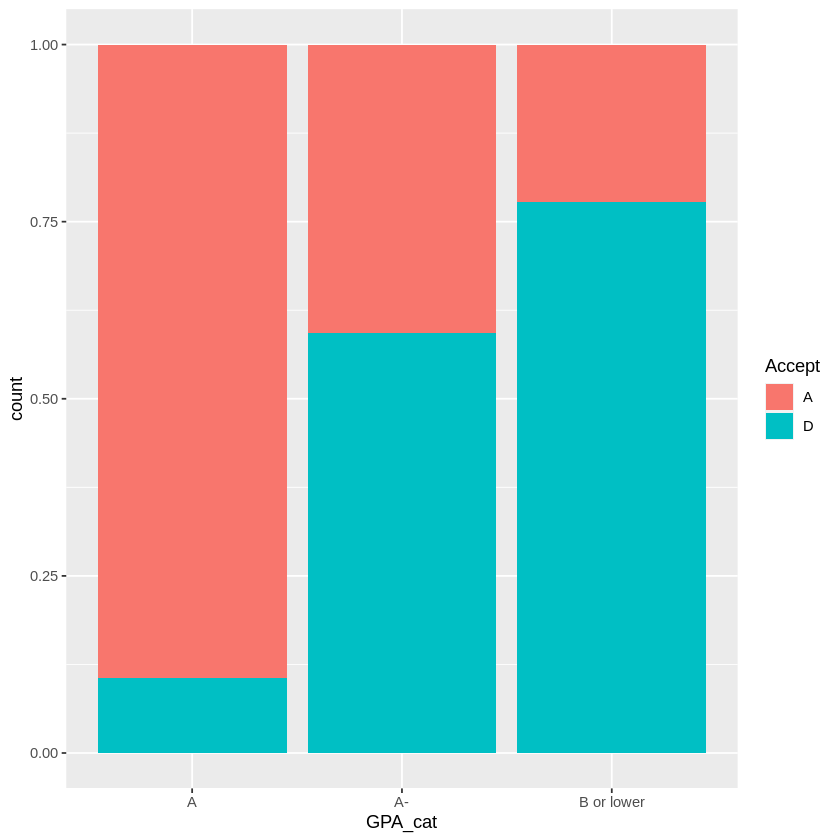

In [ ]:
library(ggplot2)
ggplot(data = medgpa) +
  geom_bar(aes(x = GPA_cat, fill = Accept), position='fill')

***The rate of acceptance is clearly related to GPA category: highest for A's, lowest for B or lower.***

## B)

Fit the following model:

$$logit(P(Y_i = 1|GPA3_i)) = \beta_0 + \beta_1 GPA3_i$$

Interpret both model coefficients (or functions thereof), and fully summarize the nature of the modeled relationship between GPA and acceptance from this model.

In [ ]:
mod1 <- glm(Acceptance~GPA3, data = medgpa, family=binomial)

In [ ]:
summary(mod1)


Call:
glm(formula = Acceptance ~ GPA3, family = binomial, data = medgpa)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7805  -0.8522   0.4407   0.7819   2.0967  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.8440     0.9399  -3.026 0.002478 ** 
GPA3          5.4542     1.5792   3.454 0.000553 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 56.839  on 53  degrees of freedom
AIC: 60.839

Number of Fisher Scoring iterations: 4


In [ ]:
exp(confint(mod1))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.007313255,0.3036997
GPA3,14.825011298,7829.2459518


In [ ]:
exp(-2.844)

[1] 0.05819243

In [ ]:
exp(5.45)

[1] 232.7582

***The odds of acceptance are only 0.058 for students with a GPA of 3.0.  Students with a GPA 1 point higher, so 3.0 to 4.0, have an odds of acceptance that are 233 times higher than students with a GPA of 3.0.  GPA is strongly related to odds of acceptance (p-value < .001, 95% CI for OR: 14.8, 7829.2).***

## C)

Using this model, fully characterize the estimated change in odds of acceptance for two students who differ by 0.3 in their GPA.  (Hint: `emmeans`)

In [ ]:
install.packages('emmeans')
library(emmeans)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
em1 <- emmeans(mod1, ~GPA3, at = list(GPA3 = c(3.3, 3.0)))

In [ ]:
em1

 GPA3 emmean   SE  df asymp.LCL asymp.UCL
  3.3   15.2 4.34 Inf      6.65      23.7
  3.0   13.5 3.87 Inf      5.93      21.1

Results are given on the logit (not the response) scale. 
Confidence level used: 0.95 

In [ ]:
contrast(em1, 'pairwise', type = 'response')

 contrast        odds.ratio   SE  df null z.ratio p.value
 GPA33.3 / GPA33       5.14 2.43 Inf    1   3.454  0.0006

Tests are performed on the log odds ratio scale 

In [ ]:
confint(contrast(em1, 'pairwise', type = 'response'))

,contrast,odds.ratio,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,GPA33.3 / GPA33,5.135873,2.433123,Inf,2.02935,12.99785


***The odds of acceptance are 5.14 times higher for a 0.3-point increase in GPA, a statistically significant odds ratio (p-value = 0.0006, 95% CI for OR: (2.0, 13.0).***

## D)


Fit a logistic regression model using `GPA_cat` instead of `GPA3`. Use this model to fully compare the odds of acceptance, comparing:

* A to A- students;
* A- to B students


In [ ]:
mod2 <- glm(Acceptance  ~ GPA_cat, data = medgpa, family=binomial)

In [ ]:
summary(mod2)


Call:
glm(formula = Acceptance ~ GPA_cat, family = binomial, data = medgpa)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1219  -1.0230   0.4717   0.4717   1.7344  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)   
(Intercept)         2.1401     0.7475   2.863  0.00420 **
GPA_catA-          -2.5148     0.8439  -2.980  0.00288 **
GPA_catB or lower  -3.3928     1.0962  -3.095  0.00197 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.791  on 54  degrees of freedom
Residual deviance: 58.820  on 52  degrees of freedom
AIC: 64.82

Number of Fisher Scoring iterations: 4


In [ ]:
(em2 <- emmeans(mod2, ~GPA_cat))

 GPA_cat    emmean    SE  df asymp.LCL asymp.UCL
 A           2.140 0.748 Inf     0.675     3.605
 A-         -0.375 0.392 Inf    -1.142     0.393
 B or lower -1.253 0.802 Inf    -2.824     0.319

Results are given on the logit (not the response) scale. 
Confidence level used: 0.95 

In [ ]:
#Method #1 for doing the contrasts; customized contrast coefficients:
contrast(em2, method = list('A vs A-' = c(1,-1,0),
                            'A- vs B' = c(0,-1,1)),type='response')

 contrast odds.ratio     SE  df null z.ratio p.value
 A vs A-      12.364 10.434 Inf    1   2.980  0.0029
 A- vs B       0.416  0.371 Inf    1  -0.984  0.3251

Tests are performed on the log odds ratio scale 

In [ ]:
#Method 2, shortcut using method='consec':
contrast(em2, method='consec',type='response', reverse=TRUE)

 contrast          odds.ratio    SE  df null z.ratio p.value
 A / (A-)               12.36 10.43 Inf    1   2.980  0.0057
 (A-) / B or lower       2.41  2.15 Inf    1   0.984  0.5396

P value adjustment: mvt method for 2 tests 
Tests are performed on the log odds ratio scale 

In [ ]:
confint(contrast(em2, method='consec',type='response', reverse=TRUE))

,contrast,odds.ratio,SE,df,asymp.LCL,asymp.UCL
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A / (A-),12.36364,10.433768,Inf,1.8784184,81.37671
2,(A-) / B or lower,2.40625,2.147186,Inf,0.3281134,17.64646


***The odds of acceptance with A grades are 12 times higher than with A- grades, a statistically significant odds ratio (p-value = 0.0057, 95% CI for OR: (1.9, 81.4).  While the odds of acceptance for students with A- grades are 2.4 times higher than the odds of acceptance for students with grades of B or lower, this ratio is not statistically significant (p-value = 0.54, 95% CI for OR: 0.33, 17.64 overlaps 1.)***